## Observations and Insights 

In [1]:
#  Capomulin and Ramicane had lower average Tumor Volumes than Infubiol and Ceftamin  and all the other drugs with 
#  Capomulin and Ramicane in the (40 mm3) range and all others drugs in the (50 mm3) range.
#  Capomulin and Ramicane also had tighter clustering of tumor volumes around the mean with variances and STD 
#  in the low 20's and 4's respectively compared to the other drugs that had variances and STD's in the 40's to mid 60's
#  with STD ranging from 6-8.
#  This suggests that they appear to be better candidates for treatment of the cancer that caused these types of tumors.
#
#  Their is very strong correlation between tumor volume size and weight in Capomulin with a 84%  linear dependence /parmetric
#  correlation between the two variables.  Not exactly sure what this suggests for humans, as I never heard that being ligher 
#  would could reduce the size of cancer tumors in humans, but it appears to be the case in mice and would suggest further
#  analysis from the human perspective.
#
#  Mouse 401 on Capomulin had a decrease in tumor volume at all timepoints up to 40 and then a slight increase from 40-45.  
#  This suggests the Capomulin was very effective over the course of treatment, but that the cancer may have developed some
#  resistance to the drug after a certain time has passed.  Would look to analyze other mice on Capomulin to see if there were
#  similar results to determine if this is sign of potential resistance is present across the regimen.
#  

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

comb_mice_data = pd.merge(mouse_metadata,study_results, on = "Mouse ID")


# Display the data table for preview
comb_mice_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [4]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [5]:
# Checking the number of mice.
number_of_mice = len(study_results)
number_of_mice

1893

In [6]:
#Checking for Unique Mice
number_of_mice= comb_mice_data["Mouse ID"].nunique()
number_of_mice

249

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_dups = comb_mice_data[comb_mice_data.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]
mice_dups

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
mice_dups


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_mice = comb_mice_data.drop_duplicates(
  subset = ['Mouse ID', 'Timepoint'], keep = 'last').reset_index(drop = True)
clean_mice
  

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1883,z969,Naftisol,Male,9,30,25,63.145652,2
1884,z969,Naftisol,Male,9,30,30,65.841013,3
1885,z969,Naftisol,Male,9,30,35,69.176246,4
1886,z969,Naftisol,Male,9,30,40,70.314904,4


In [10]:
# Checking the number of mice in the clean DataFrame.
clean_number_of_mice = len(clean_mice)
clean_number_of_mice


1888

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

clean_mice_ave = clean_mice.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
clean_mice_median = clean_mice.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
clean_mice_var = clean_mice.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
clean_mice_std = clean_mice.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
clean_mice_sem = clean_mice.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

mice_tumor_stats_df = pd.DataFrame([clean_mice_ave,clean_mice_median,clean_mice_var,clean_mice_std,clean_mice_sem])


In [12]:
mice_tumor_stats_df

Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Tumor Volume (mm3),40.675741,52.591172,52.884795,55.235638,54.331565,54.033581,52.382993,40.216745,54.233149,53.236507
Tumor Volume (mm3),41.557809,51.776157,51.820584,53.698743,52.509285,52.288934,50.783528,40.673236,52.431737,51.818479
Tumor Volume (mm3),24.947764,39.290177,43.128684,68.553577,66.173479,61.168083,43.220205,23.486704,59.450562,48.533355
Tumor Volume (mm3),4.994774,6.268188,6.567243,8.279709,8.134708,7.821003,6.574208,4.846308,7.710419,6.966589
Tumor Volume (mm3),0.329346,0.469821,0.492236,0.603860,0.596466,0.581331,0.526358,0.320955,0.573111,0.516398


In [13]:
# Using the aggregation method, produce the same summary statistics in a single line
mice_tumor_stats_agg = clean_mice.groupby('Drug Regimen')["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem']) 
mice_tumor_stats_agg


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Timepoints')

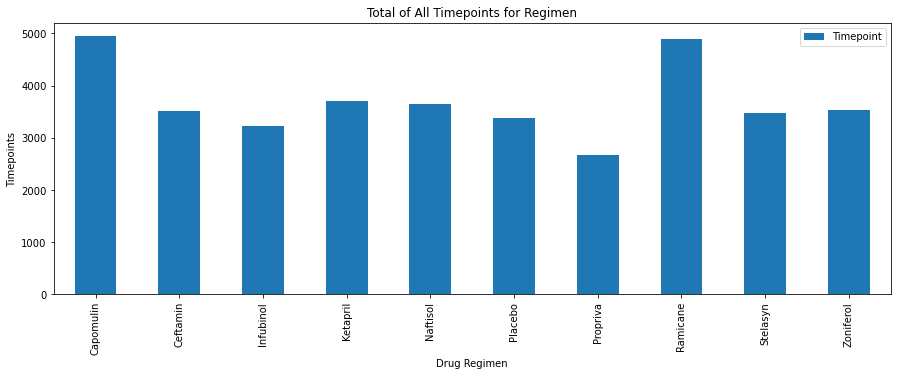

In [14]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
tp_pandas_bar = clean_mice.groupby('Drug Regimen')["Timepoint"].sum().to_frame()  
tp_pandas_bar.plot(kind="bar", figsize=(15,5))
plt.title('Total of All Timepoints for Regimen')
plt.ylabel("Timepoints")    
    

Text(0, 0.5, 'Timepoints')

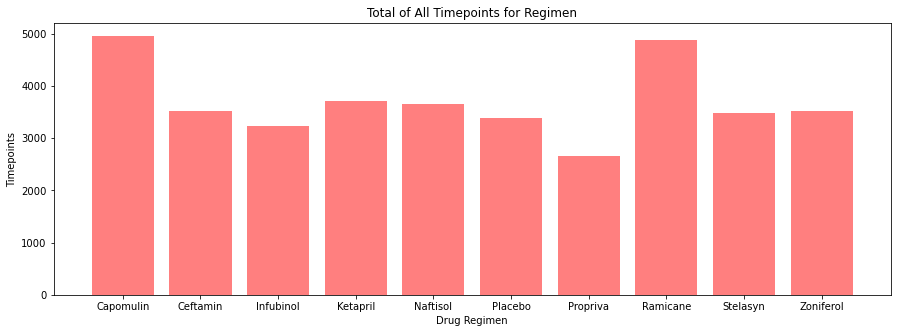

In [15]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = np.arange(len(tp_pandas_bar))
tick_locations = [value for value in x_axis]
tp_pandas_bar = tp_pandas_bar.reset_index()

plt.figure(figsize = (15,5))
plt.bar(x_axis, tp_pandas_bar["Timepoint"], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, tp_pandas_bar["Drug Regimen"])

# Set x and y limits
#plt.xlim(-0.75, len(x_axis))
#plt.ylim(0, max(tp_pandas_bar["Timepoint"])+10)

plt.title("Total of All Timepoints for Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints")

 

In [16]:
tick_locations

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

<AxesSubplot:title={'center':'Male vs. Female Mice Count'}, ylabel='Mouse ID'>

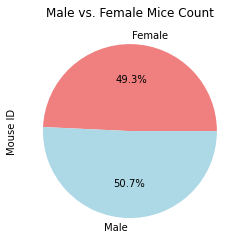

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

clean_mice.groupby(['Sex']).count().plot(kind='pie', y='Mouse ID',legend = "", autopct='%1.1f%%',
                                colors = ['lightcoral','lightblue'],
                                title='Male vs. Female Mice Count')




,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,
Female,930,930,930,930,930,930,930
Male,958,958,958,958,958,958,958


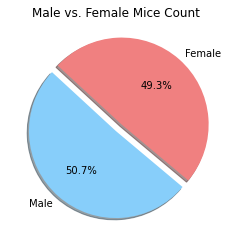

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_mouse = clean_mice.groupby('Sex').count()
 

# Labels for the sections of our pie chart
labels = ["Female", "Male"]

# The values of each section of the pie chart
female_mice = gender_mouse.iloc[0,1]
male_mice = gender_mouse.iloc[1,1]
male_mice 

sizes = [female_mice, male_mice]

# The colors of each section of the pie chart
colors = ["lightcoral", "lightskyblue"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.1, 0)


# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=1400)
plt.title("Male vs. Female Mice Count")
gender_mouse


## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
great_mice_timepoint = clean_mice.groupby("Mouse ID").max("Timepoint")


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumor_vol_last_time = pd.merge(clean_mice, great_mice_timepoint, on=["Mouse ID","Timepoint"])

In [29]:
# Put treatments into a list for for loop (and later for plot labels)
 
treatment_name_list= ["Capomulin","Ramicane","Infubinol","Ceftamin"]
 
# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data_list = []
lower_bounds =[]
upper_bounds =[]


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
# Locate the rows which contain mice on each drug and get the tumor volumes

master_df = pd.DataFrame(clean_mice)

#  Create the function to call for each Drug Regimen we want to assess
def get_info(parameter, measurement, col):
    df = master_df.loc[master_df[col] == parameter, :]
    return df[measurement]

# Loop through each Regimen and identify potential outliers
for treatment in treatment_name_list:
    tumor_volume_data_df = pd.DataFrame(get_info(treatment,"Tumor Volume (mm3)", "Drug Regimen"))
    
    df = tumor_volume_data_df
    sorted(df)    
    Q1,Q3 = np.percentile(df , [25,75])
    IQR = Q3-Q1
    lower_range = Q1-(1.5 * IQR)
    upper_range = Q3+(1.5 * IQR)
    
#    Print the outliers only when their are values

    lower_outliers = tumor_volume_data_df.loc[tumor_volume_data_df["Tumor Volume (mm3)"] < lower_range]
    upper_outliers = tumor_volume_data_df.loc[tumor_volume_data_df["Tumor Volume (mm3)"] > upper_range]
    
    if len(lower_outliers) > 0:
        print("Potential Lower Outliers for " + str(treatment) + " are: " + str(lower_outliers));
    else:
        print("There are no Lower Outliers for " + str(treatment)); 
    
    if len(upper_outliers) > 0:
        print("Potential Upper Outliers for " + str(treatment) + " are: " + str(upper_outliers));
    else:
        print("There are no Upper Outliers for " + str(treatment)); 
        


Potential Lower Outliers for Capomulin are:     Tumor Volume (mm3)
18           25.472143
19           23.343598
There are no Upper Outliers for Capomulin
Potential Lower Outliers for Ramicane are:    Tumor Volume (mm3)
9           22.050126
There are no Upper Outliers for Ramicane
There are no Lower Outliers for Infubinol
There are no Upper Outliers for Infubinol
There are no Lower Outliers for Ceftamin
There are no Upper Outliers for Ceftamin


In [21]:
# Put treatments into a list for for loop (and later for plot labels)
 
treatment_name_list= ["Capomulin","Ramicane","Infubinol","Ceftamin"]
 
# Create empty list to fill with tumor vol data (for plotting)
final_tumor_vol_data = []
 

# Locate the rows which contain mice on each drug and get the tumor volumes

master_df = pd.DataFrame(clean_mice)
    
def get_info(parameter, measurement, col):
    df = master_df.loc[master_df[col] == parameter, :]
    return df[measurement]

 
for treatment in treatment_name_list:
    final_tumor_vol_data.append(get_info(treatment,"Tumor Volume (mm3)", "Drug Regimen"))
    




(15.0, 75.0)

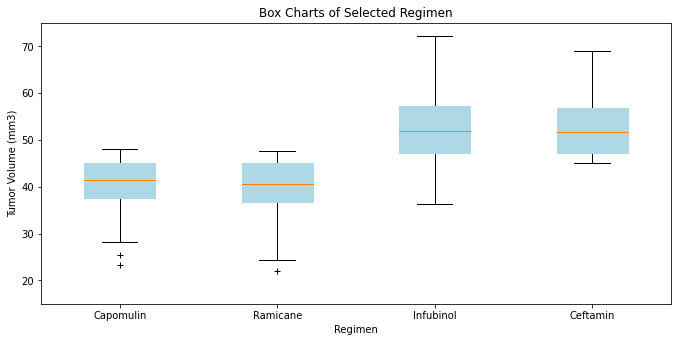

In [27]:
#  Print the Box Charts

fig, ax1 = plt.subplots(figsize=(10, 6))
fig.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)
bp = ax1.boxplot(final_tumor_vol_data, notch=0, sym='+', vert=1, whis=1.5,patch_artist=True,labels = treatment_name_list)
plt.setp(bp['boxes'], color='lightblue')
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['fliers'], color='red', marker='+')

# Add Title and Axis Labels
ax1.set(
    axisbelow=True,  # Hide the grid behind plot objects
    title='Box Charts of Selected Regimen',
    xlabel='Regimen',
    ylabel='Tumor Volume (mm3)',
    )

  
# Set the axes ranges  
ax1.set_xlim(0.5)
top = 75
bottom = 15
ax1.set_ylim(bottom, top)


## Line and Scatter Plots

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

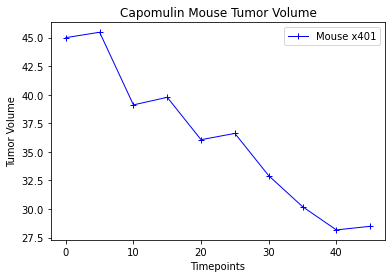

In [23]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

x_axis = np.arange(0,50,5)
x_axis


cap_mouse = clean_mice[clean_mice['Mouse ID'] == 'x401']
points_x = cap_mouse["Tumor Volume (mm3)"].tolist()
points_y = cap_mouse["Timepoint"].tolist()

points_x


tumor_volume, = plt.plot(x_axis, points_x, marker="+",color="blue", linewidth=1, label="Mouse x401")
 


# Set our legend to where the chart thinks is best
plt.legend(handles=[tumor_volume], loc="best")


# Create labels for the X and Y axis
plt.xlabel("Timepoints")
plt.ylabel("Tumor Volume")
plt.title("Capomulin Mouse Tumor Volume")
plt.plot

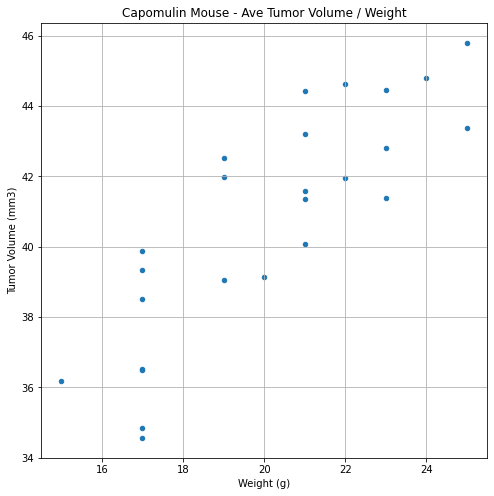

In [24]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
all_cap_mouse = clean_mice[clean_mice['Drug Regimen'] == 'Capomulin']

ave_cap_mouse = all_cap_mouse.groupby("Mouse ID").mean()

# Create a scatter plot which compares MPG to horsepower
ave_cap_mouse.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", grid=True, figsize=(8,8),
              title="Capomulin Mouse - Ave Tumor Volume / Weight")
plt.show()


## Correlation and Regression

In [25]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

st.pearsonr(ave_cap_mouse['Tumor Volume (mm3)'], ave_cap_mouse['Weight (g)'])


(0.8419363424694721, 1.3225722434712388e-07)

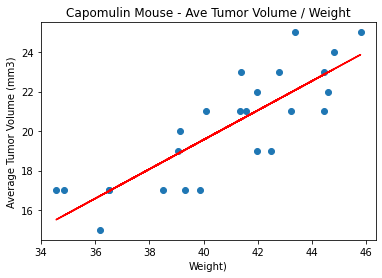

In [26]:
# Print the updated Scatter plot with Regression Line

from sklearn.linear_model import LinearRegression
lr= LinearRegression()
points_x = ave_cap_mouse["Tumor Volume (mm3)"].tolist()
points_y = ave_cap_mouse["Timepoint"].tolist()


X = ave_cap_mouse.iloc[:,3].values.reshape(-1, 1)  # values converts it into a numpy array
Y = ave_cap_mouse.iloc[:,1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.title("Capomulin Mouse - Ave Tumor Volume / Weight")
 
plt.xlabel("Weight)")
plt.ylabel("Average Tumor Volume (mm3)")
 
plt.show()





